In [1]:
!pip install ucimlrepo

In [ ]:
#High global mortality from cardiovascular diseases, particularly myocardial infarctions and heart failure, 
#where the heart fails to pump enough blood. 
#Utilizing electronic medical records for biostatistics and machine learning analysis to predict patient survival and 
#identify crucial features, providing insights beyond traditional medical assessments.

In [137]:
#Importing required packages
#Importing data from excel and from the UCIML Repository

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from ucimlrepo import fetch_ucirepo
  
# fetch dataset 
heart_failure_clinical_records = fetch_ucirepo(id=519) 
  
# data (as pandas dataframes) 
X = heart_failure_clinical_records.data.features 
y = heart_failure_clinical_records.data.targets 
  
# metadata 
print(heart_failure_clinical_records.metadata) 
  
# variable information 
print(heart_failure_clinical_records.variables)

df = pd.read_csv("C://Users//user//Desktop//Course Content//Trimester 5//Assignment//DA//heart_failure_clinical_records_dataset.csv",encoding_errors='strict')

df.head()

{'uci_id': 519, 'name': 'Heart failure clinical records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'title': 'Machine learning can predict survival of patients with heart failure from serum creatinine and ejec

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


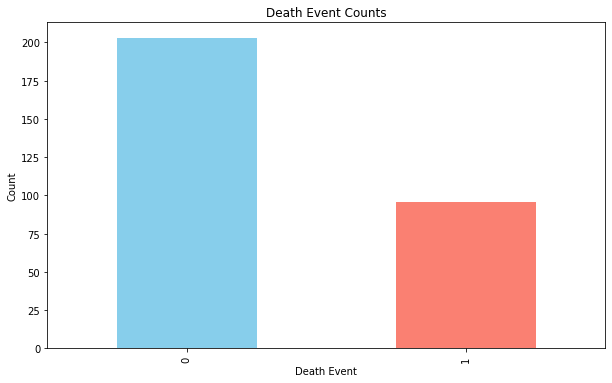

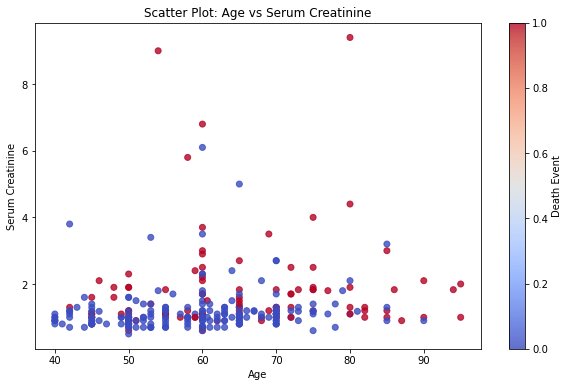

In [138]:
plt.figure(figsize=(10, 6)) #figure size

# Bar chart for Death Event counts
death_event_counts = df['DEATH_EVENT'].value_counts()
death_event_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Death Event Counts')
plt.xlabel('Death Event')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))#figure size

# Scatter plot for Age and Serum Creatinine
plt.scatter(df['age'], df['serum_creatinine'], c=df['DEATH_EVENT'], cmap='coolwarm', alpha=0.8)
plt.title('Scatter Plot: Age vs Serum Creatinine')
plt.xlabel('Age')
plt.ylabel('Serum Creatinine')
plt.colorbar(label='Death Event')
plt.show()

In [139]:
#Checking for the data types
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [140]:
#Checking for size of the data
df.shape

(299, 13)

In [141]:
#Checking for missing values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [142]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [147]:
#Finding pearson correlation matrix
corr = df.corr(method='pearson')
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


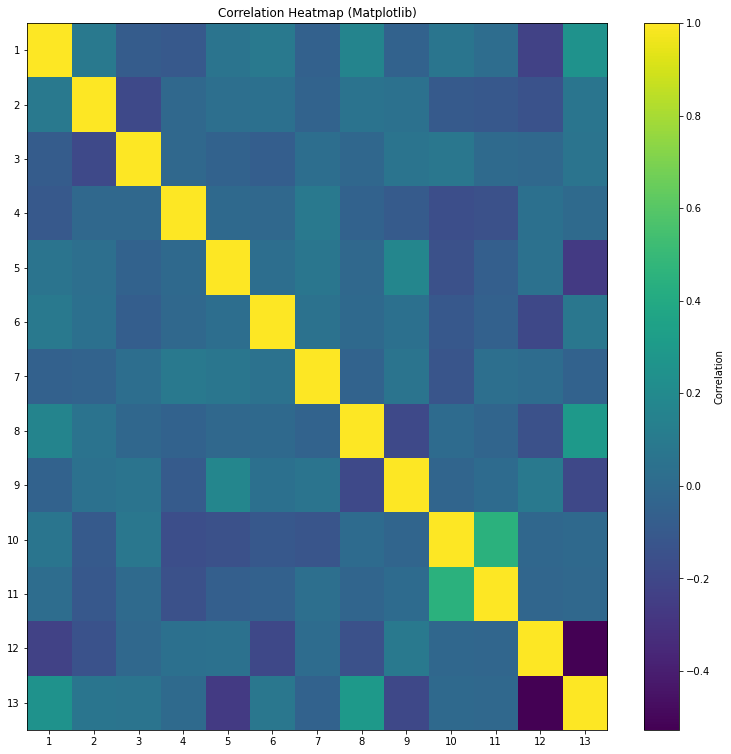

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Using matplotlib to create a heatmap of correlation
plt.figure(figsize=(13, 13))
plt.imshow(corr, cmap='viridis', interpolation='none', aspect='auto')
plt.colorbar(label='Correlation')
plt.title('Correlation Heatmap (Matplotlib)')
plt.xticks(range(len(corr)), range(1, len(corr) + 1))
plt.yticks(range(len(corr)), range(1, len(corr) + 1))
plt.show()

In [83]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [84]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() #Creating variable for StandardScaler 

In [85]:
df['age_sc']=ss.fit_transform(df[['age']])
df['creatinine_phosphokinase_sc']=ss.fit_transform(df[['creatinine_phosphokinase']])
df['ejection_fraction_sc']=ss.fit_transform(df[['ejection_fraction']])
df['platelets_sc']=ss.fit_transform(df[['platelets']])
df['serum_creatinine_sc']=ss.fit_transform(df[['serum_creatinine']])
df['serum_sodium_sc']=ss.fit_transform(df[['serum_sodium']])
df['time_sc']=ss.fit_transform(df[['time']])

df.drop(['age','time','serum_sodium','serum_creatinine','platelets','ejection_fraction','creatinine_phosphokinase',],axis=1,inplace=True)

In [86]:
df.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT,age_sc,creatinine_phosphokinase_sc,ejection_fraction_sc,platelets_sc,serum_creatinine_sc,serum_sodium_sc,time_sc
0,0,0,1,1,0,1,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502
1,0,0,0,1,0,1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0,0,0,1,1,1,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,1,0,0,1,0,1,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,1,1,0,0,0,1,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


In [87]:
#K-NEAREST NEIGHBOURING ALGORITHM

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Deciding target variable and dependent variable
y = df['DEATH_EVENT']
x = df[['age_sc','anaemia','diabetes','high_blood_pressure', 'creatinine_phosphokinase_sc','serum_creatinine_sc','platelets_sc','ejection_fraction_sc','serum_sodium_sc','time_sc','sex','smoking']]

#Dividing the Dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y) #70% training and 30% testing

In [88]:
y #display of object

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [89]:
x #display of object

,age_sc,anaemia,diabetes,high_blood_pressure,creatinine_phosphokinase_sc,serum_creatinine_sc,platelets_sc,ejection_fraction_sc,serum_sodium_sc,time_sc,sex,smoking
0,1.192945,0,0,1,0.000166,0.490057,1.681648e-02,-1.530560,-1.504036,-1.629502,1,0
1,-0.491279,0,0,0,7.514640,-0.284552,7.535660e-09,-0.007077,-0.141976,-1.603691,1,0
2,0.350833,0,0,0,-0.449939,-0.090900,-1.038073e+00,-1.530560,-1.731046,-1.590785,1,1
3,-0.912335,1,0,0,-0.486071,0.490057,-5.464741e-01,-1.530560,0.085034,-1.590785,1,0
4,0.350833,1,1,0,-0.435486,1.264666,6.517986e-01,-1.530560,-4.682176,-1.577879,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,0,1,1,-0.537688,-0.284552,-1.109765e+00,-0.007077,1.447094,1.803451,1,1
295,-0.491279,0,0,0,1.278215,-0.187726,6.802472e-02,-0.007077,0.539054,1.816357,0,0
296,-1.333392,0,1,0,1.525979,-0.575031,4.902082e+00,1.854958,0.312044,1.906697,0,0
297,-1.333392,0,0,0,1.890398,0.005926,-1.263389e+00,-0.007077,0.766064,1.932509,1,1


In [90]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

#Identifying type of metric to be used by algorithm and giving a starting value of no. of neighbors
knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean') 
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [91]:
y_pred = knn.predict(X_test)

In [92]:
confusion_matrix(y_test, y_pred)

array([[60,  1],
       [25,  4]], dtype=int64)

In [93]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [94]:
print("Accuracy Score is:",accuracy_score(y_test, y_pred))
print("Recall is:",recall_score(y_test, y_pred))
print("F1 Score is:",f1_score(y_test, y_pred))
print("Precision Score is:",precision_score(y_test, y_pred))

Accuracy Score is: 0.7111111111111111
Recall is: 0.13793103448275862
F1 Score is: 0.2352941176470588
Precision Score is: 0.8


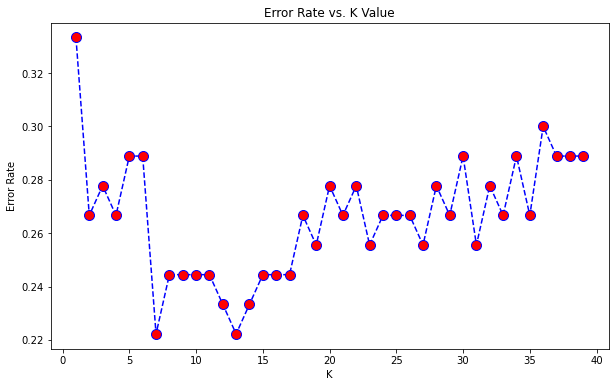

Minimum error:- 0.2222222222222222 at K = 7


In [95]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

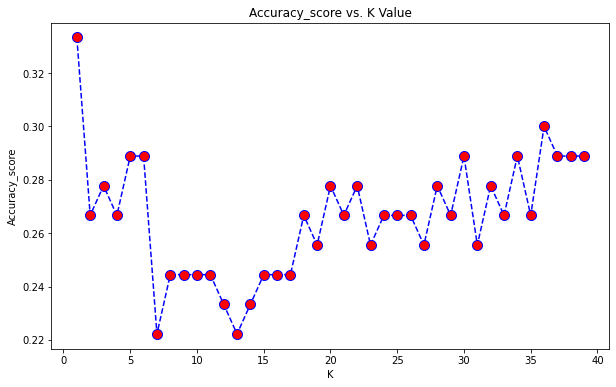

Accuracy score:- 0.7777777777777778 at K = 7


In [96]:
accuracy = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    #print (pred_i)
    #print (1-accuracy_score(y_test, pred_i))
    #print(accuracy_score(y_test, pred_i))
    accuracy.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy_score vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy_score')
plt.show()
print("Accuracy score:-",max(accuracy),"at K =",accuracy.index(max(accuracy))+1)

In [97]:
knn1 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn1.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [98]:
y_pred1 = knn1.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.7777777777777778

In [134]:
#Creating Classification Report using classification module form scikit-learn
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86        61
           1       0.91      0.34      0.50        29

    accuracy                           0.78        90
   macro avg       0.83      0.66      0.68        90
weighted avg       0.81      0.78      0.74        90



In [100]:
X_test.head()

,age_sc,anaemia,diabetes,high_blood_pressure,creatinine_phosphokinase_sc,serum_creatinine_sc,platelets_sc,ejection_fraction_sc,serum_sodium_sc,time_sc,sex,smoking
200,0.182411,1,0,0,1.223500,-0.671857,-1.949580,0.585389,0.085034,0.719360,1,0
183,1.192945,0,0,1,-0.498459,1.071014,-0.403091,-0.007077,-0.595996,0.409620,1,0
146,-0.743913,0,0,0,-0.464392,-0.671857,-0.464541,-0.684180,-0.141976,-0.235672,1,1
223,-1.164969,0,0,0,0.000166,-0.575031,-1.365806,-1.107370,-0.595996,0.912948,1,0
120,-0.070223,1,0,1,0.160180,0.102752,-0.546474,1.854958,-0.368986,-0.455071,1,1


In [101]:
df.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT,age_sc,creatinine_phosphokinase_sc,ejection_fraction_sc,platelets_sc,serum_creatinine_sc,serum_sodium_sc,time_sc
0,0,0,1,1,0,1,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502
1,0,0,0,1,0,1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0,0,0,1,1,1,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,1,0,0,1,0,1,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,1,1,0,0,0,1,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


In [102]:
#DECISION TREE ALGORITHM

from sklearn.model_selection import train_test_split

#Deciding target variable and dependent variable
y_dt=df['DEATH_EVENT']
x_dt = df[['age_sc','anaemia','diabetes','high_blood_pressure', 'creatinine_phosphokinase_sc','serum_creatinine_sc','platelets_sc','ejection_fraction_sc','serum_sodium_sc','time_sc','sex','smoking']]

#Dividing the Dataset into training and testing
X_dt_train,X_dt_test,y_dt_train,y_dt_test = train_test_split(x_dt,y_dt,test_size=0.3,random_state=1,stratify=y) #70% training part

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import plot_tree

In [103]:
ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [104]:
ct.fit(X_dt_train,y_dt_train) # Fit the ColumnTransformer (ct) to the training data
y_dt_pred = ct.predict(X_dt_test) # Use the trained ColumnTransformer to transform and predict the target variable on the test data.

In [105]:
confusion_matrix(y_dt_test, y_dt_pred) #Creating confusion matrix

array([[46, 15],
       [13, 16]], dtype=int64)

In [133]:
#Creating Classification Report using classification module form scikit-learn
from sklearn.metrics import classification_report
print(classification_report(y_dt_test, y_dt_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77        61
           1       0.52      0.55      0.53        29

    accuracy                           0.69        90
   macro avg       0.65      0.65      0.65        90
weighted avg       0.69      0.69      0.69        90



In [106]:
#Measuring viability of the algorithm
print("Accuracy score is:",accuracy_score(y_dt_test, y_dt_pred))
print("Precision score is:",precision_score(y_dt_test, y_dt_pred))
print("Recall is:",recall_score(y_dt_test, y_dt_pred))
print("F1 score is:",f1_score(y_dt_test, y_dt_pred))

Accuracy score is: 0.6888888888888889
Precision score is: 0.5161290322580645
Recall is: 0.5517241379310345
F1 score is: 0.5333333333333333


In [107]:
X_dt_train.columns #Checking for the columns present in the training dataset

Index(['age_sc', 'anaemia', 'diabetes', 'high_blood_pressure',
       'creatinine_phosphokinase_sc', 'serum_creatinine_sc', 'platelets_sc',
       'ejection_fraction_sc', 'serum_sodium_sc', 'time_sc', 'sex', 'smoking'],
      dtype='object')

[Text(0.5, 0.875, 'node #0\ntime <= -0.81\ngini = 0.436\nsamples = 209\nvalue = [142, 67]\nclass = Death'),
 Text(0.25, 0.625, 'node #1\ncreatinine_phosphokinase <= -0.518\ngini = 0.215\nsamples = 49\nvalue = [6, 43]\nclass = No Death'),
 Text(0.125, 0.375, 'node #2\nserum_creatinine <= 1.361\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = Death'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'node #5\nejection_fraction <= 2.913\ngini = 0.13\nsamples = 43\nvalue = [3, 40]\nclass = No Death'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'node #16\nejection_fraction <= -0.896\ngini = 0.255\nsamples = 160\nvalue = [136, 24]\nclass = Death'),
 Text(0.625, 0.375, 'node #17\nejection_fraction <= -1.319\ngini = 0.499\nsamples = 25\nvalue = [12, 13]\nclass = No Death'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'node #34\nserum_crea

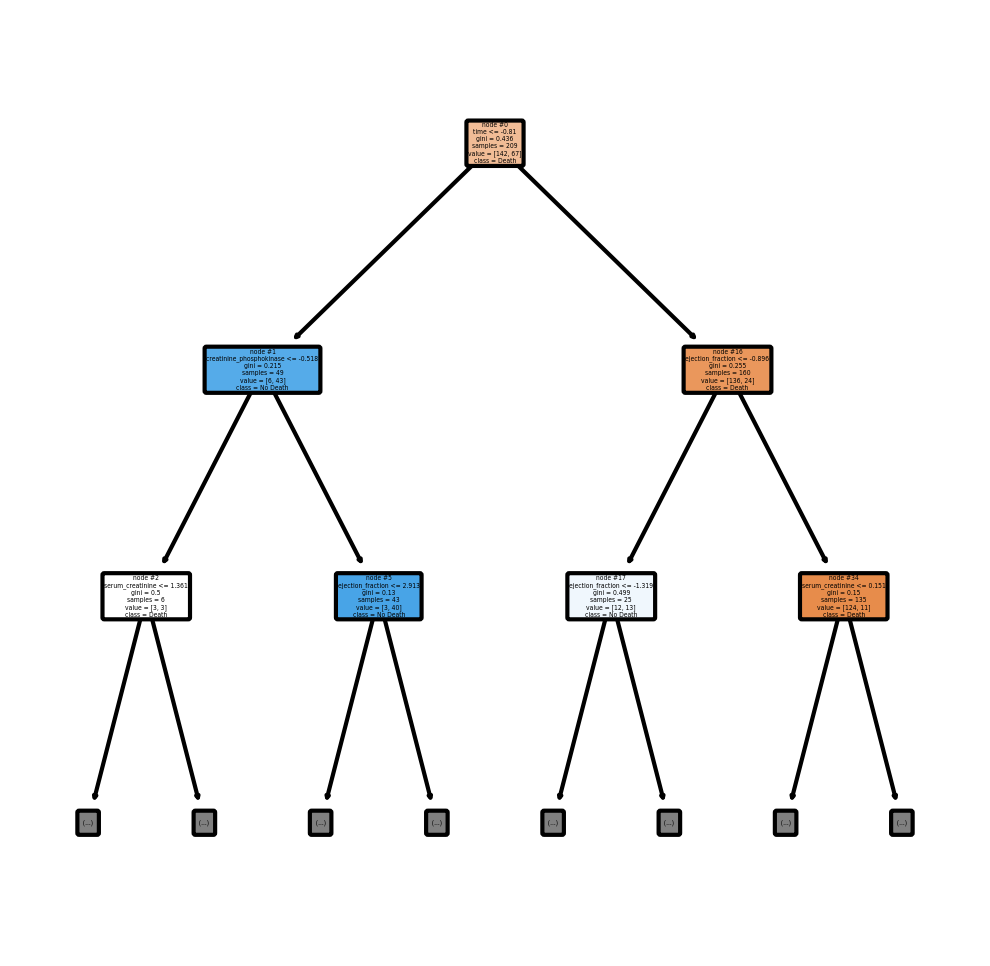

In [108]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300) #Command for sizing out the graph

#Generating Decision Tree in visual format
tree.plot_tree(ct, max_depth = 2,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['age','anaemia','diabetes','high_blood_pressure', 'creatinine_phosphokinase','serum_creatinine','platelets','ejection_fraction','serum_sodium','time','sex','smoking'],#feature names for the tree
            class_names = ["Death","No Death"] #Giving Class Names based on the target variable
              )

In [124]:
#RANDOM FOREST ALGORITHM

from sklearn.model_selection import train_test_split

#Deciding target variable and dependent variable
y_rf=df['DEATH_EVENT']
x_rf= df[['age_sc','anaemia','diabetes','high_blood_pressure', 'creatinine_phosphokinase_sc','serum_creatinine_sc','platelets_sc','ejection_fraction_sc','serum_sodium_sc','time_sc','sex','smoking']]

#Dividing the Dataset into training and testing
x_rf_train,x_rf_test,y_rf_train,y_rf_test = train_test_split(x_rf,y_rf,test_size=0.3,random_state=1,stratify=y) #70% training part
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf1=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(x_rf_train,y_rf_train)
y_rf_pred1=clf1.predict(x_rf_test)

In [125]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [126]:
#Creating confusion Matrix
metrics.confusion_matrix(y_rf_test, y_rf_pred1)

array([[53,  8],
       [13, 16]], dtype=int64)

In [127]:
#Creating Classification Report using classification module form scikit-learn
from sklearn.metrics import classification_report
print(classification_report(y_rf_test, y_rf_pred1))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        61
           1       0.67      0.55      0.60        29

    accuracy                           0.77        90
   macro avg       0.73      0.71      0.72        90
weighted avg       0.76      0.77      0.76        90



In [128]:
#Measuring viability of the model
print("Accuracy:",metrics.accuracy_score(y_rf_test, y_rf_pred1))
print ("Precision ", precision_score(y_rf_test, y_rf_pred1))
print ("Recall ",recall_score(y_rf_test, y_rf_pred1))
print ("F1 Score ",f1_score(y_rf_test, y_rf_pred1))

Accuracy: 0.7666666666666667
Precision  0.6666666666666666
Recall  0.5517241379310345
F1 Score  0.6037735849056604


In [129]:
# Calculate feature importances using the trained classifier
import pandas as pd
feature_imp = pd.Series(clf1.feature_importances_,index=X_rf_train.columns).sort_values(ascending=False)
feature_imp #displaying the same

time_sc                        0.321410
ejection_fraction_sc           0.157245
serum_creatinine_sc            0.154961
creatinine_phosphokinase_sc    0.081911
serum_sodium_sc                0.078103
platelets_sc                   0.076390
age_sc                         0.072357
anaemia                        0.014369
sex                            0.012977
high_blood_pressure            0.010907
diabetes                       0.010786
smoking                        0.008586
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


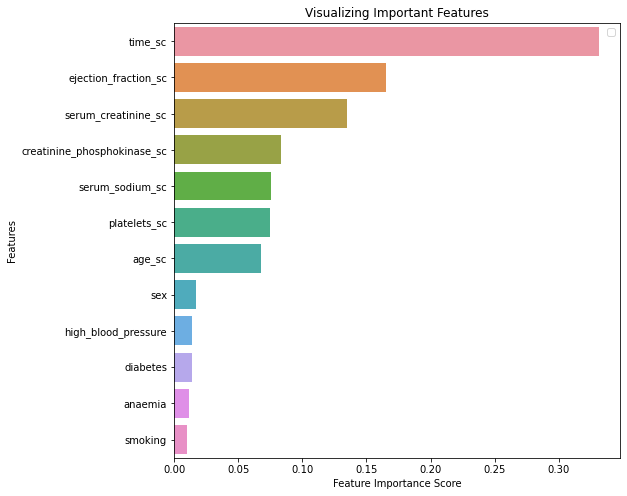

In [115]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8, 8))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

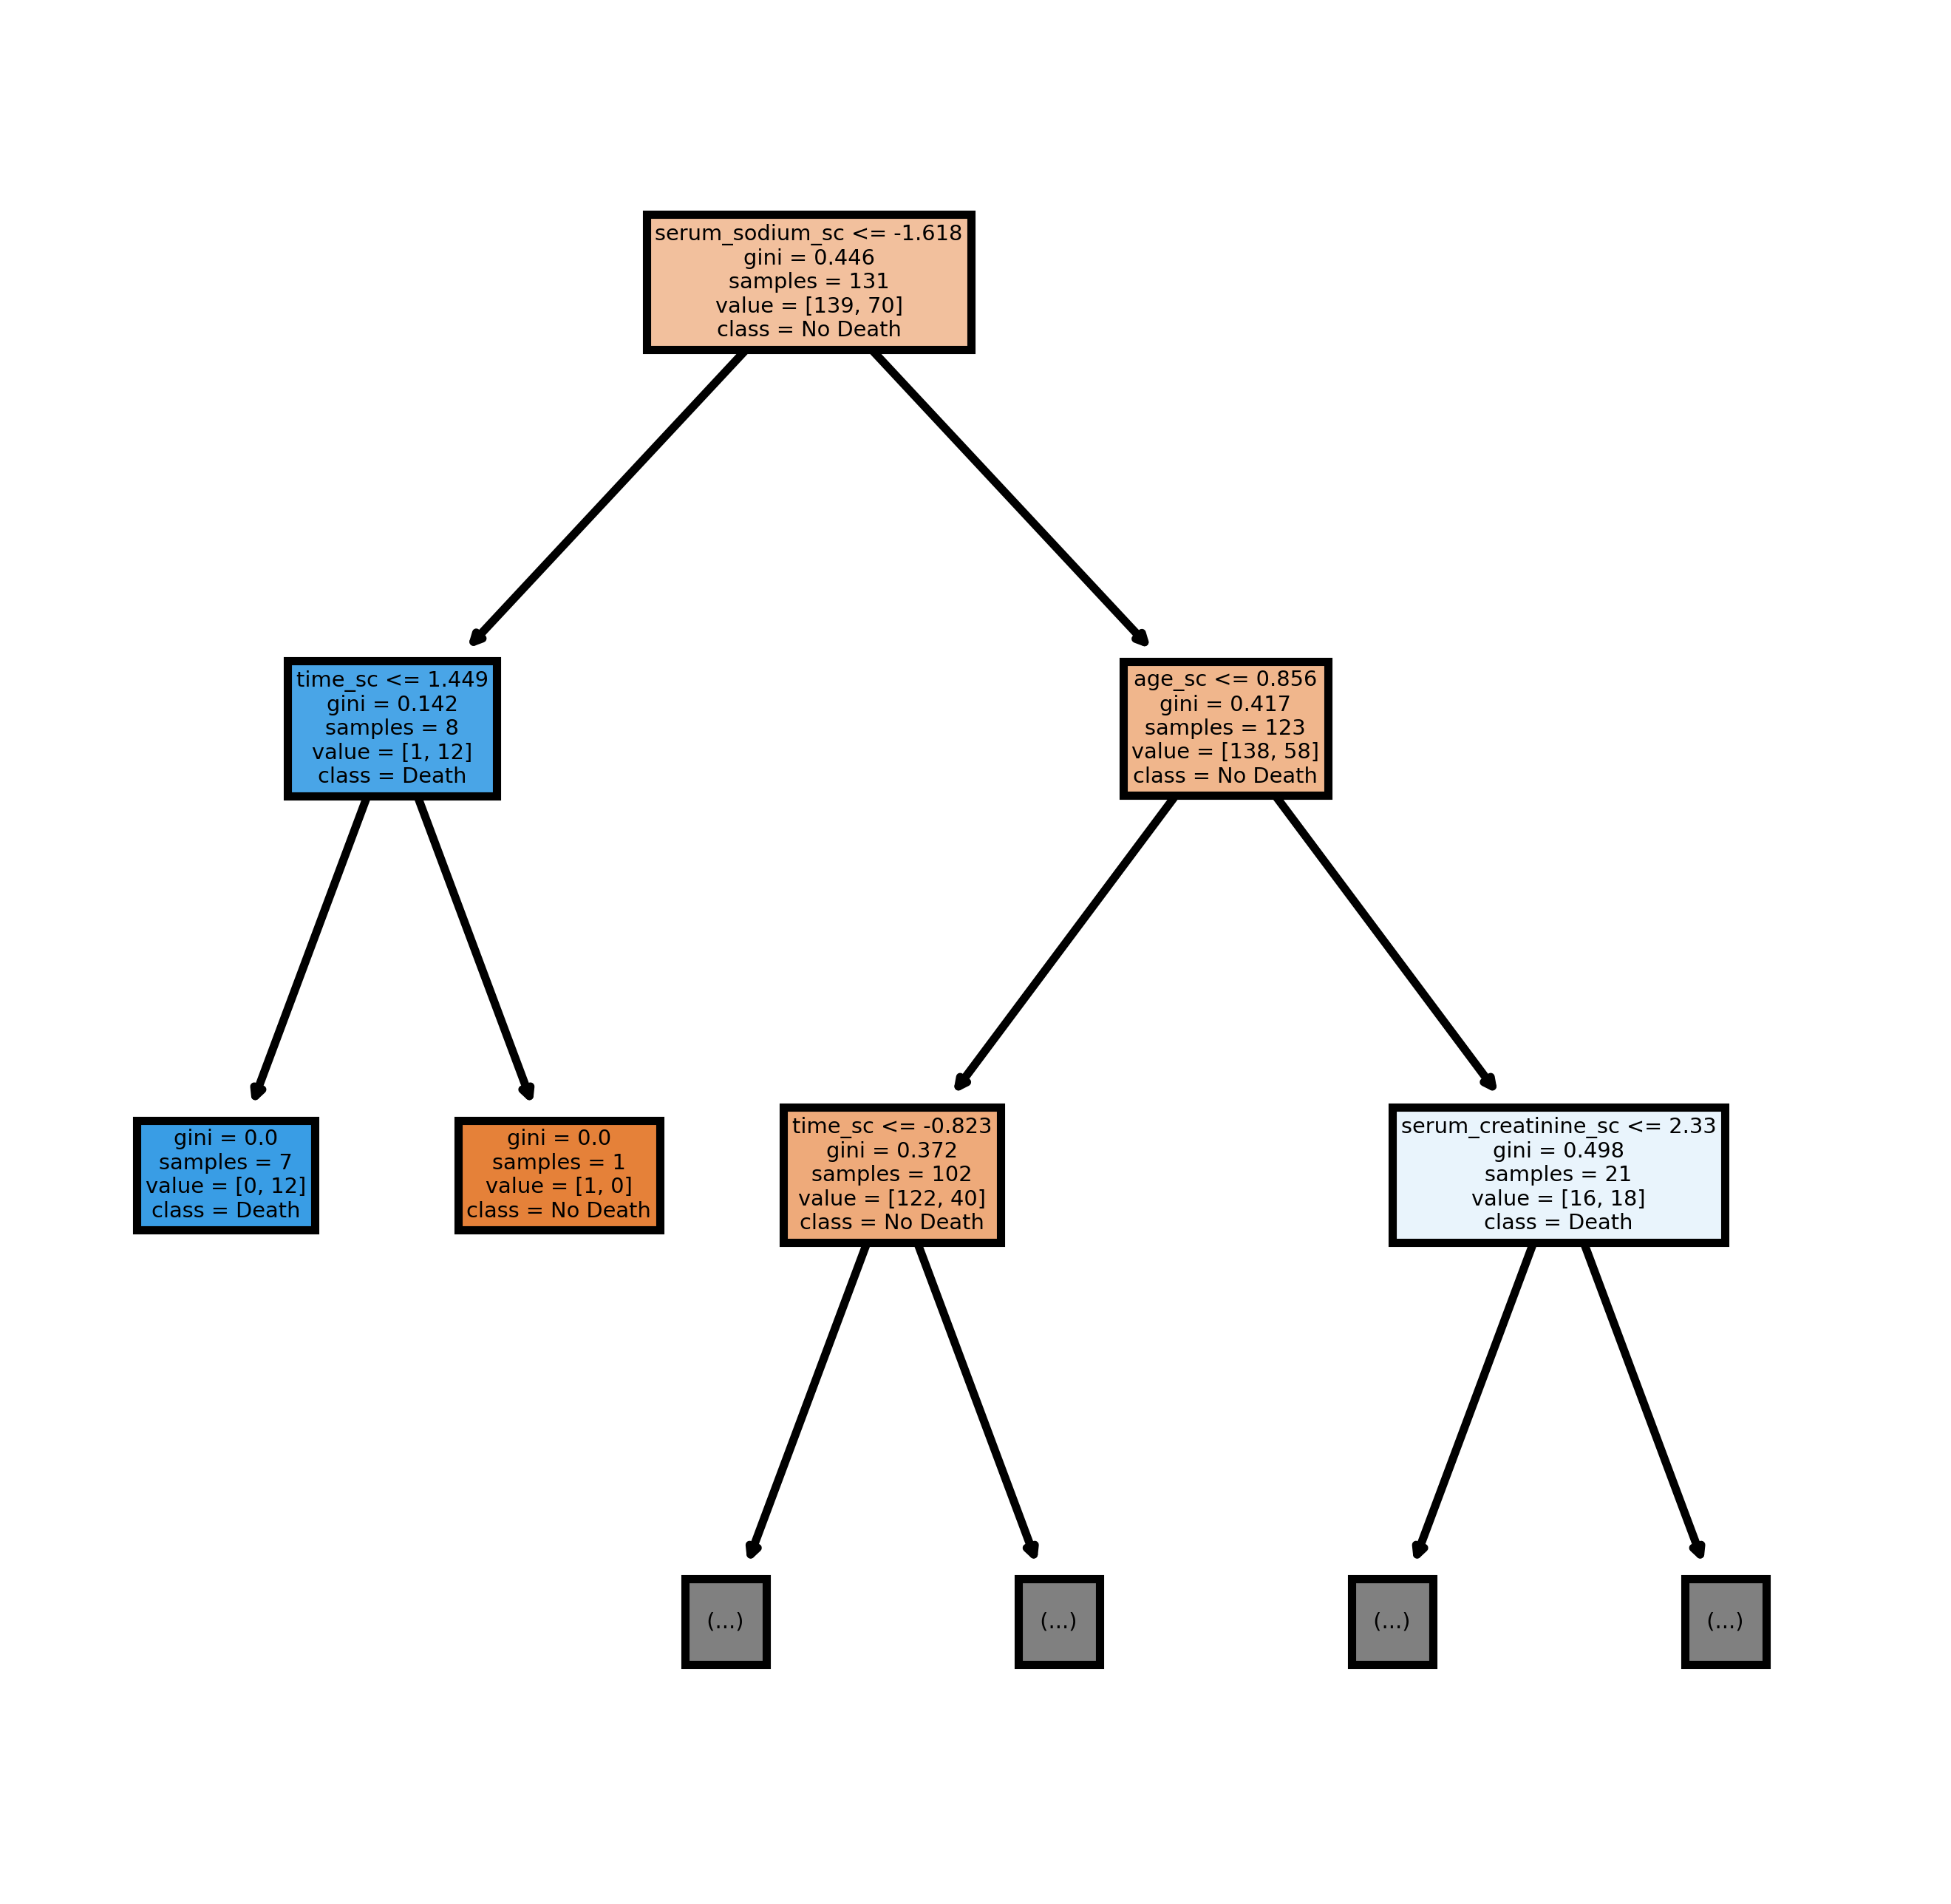

In [116]:
#visualizing result of Random Forest Algorithm
fn=X_rf_train.columns
cn=['No Death','Death']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf1.estimators_[0],
               max_depth=2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

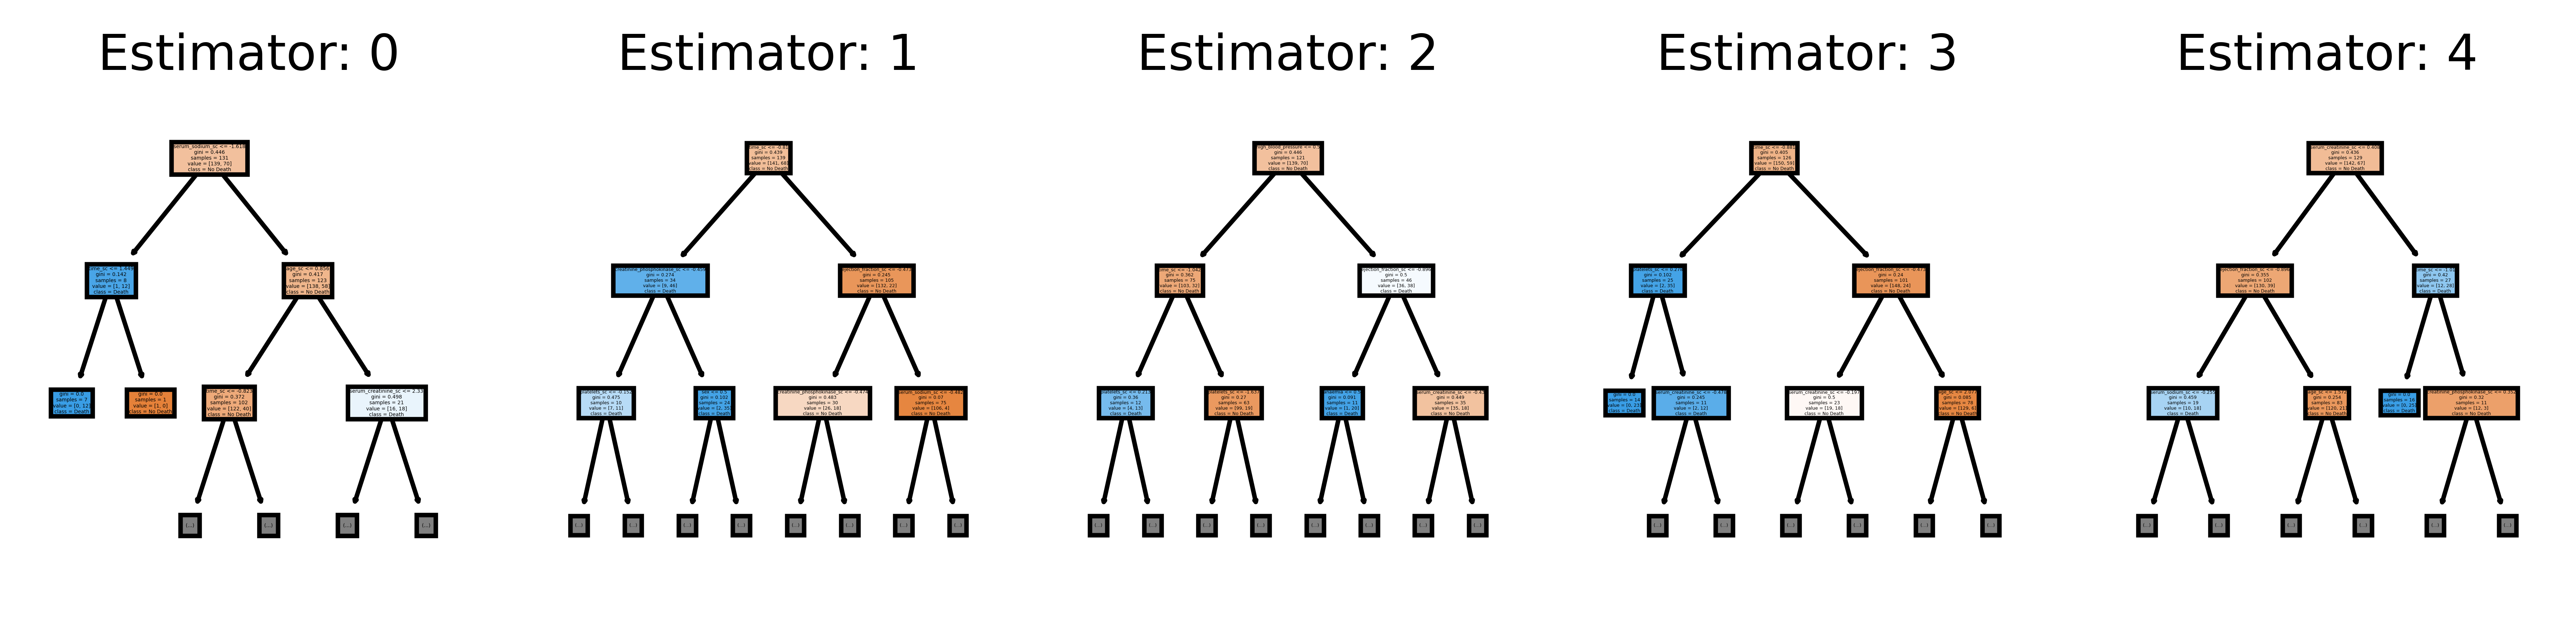

In [117]:
#visualizing Estimator results
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf1.estimators_[index],
                   max_depth=2,
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

In [121]:
#XGBOOST ALGORITHM

from sklearn.model_selection import train_test_split

#Deciding target variable and dependent variable
y_xg=df['DEATH_EVENT']
x_xg = df[['age_sc','anaemia','diabetes','high_blood_pressure', 'creatinine_phosphokinase_sc','serum_creatinine_sc','platelets_sc','ejection_fraction_sc','serum_sodium_sc','time_sc','sex','smoking']]

#Dividing the Dataset into training and testing
x_xg_train,x_xg_test,y_xg_train,y_xg_test = train_test_split(x_xg,y_xg,test_size=0.3,random_state=1,stratify=y) #70% training part

#Import XGBoost
import xgboost as xgb

#Usage of XGBoost Classifier on the training portion of dataset
model = xgb.XGBClassifier()
model.fit(x_xg_train, y_xg_train)

y_xg_pred=model.predict(x_xg_test) #Predicting dependent variable using testing portion of dataset

In [122]:
#Measuring vaibility of the algorithm
print("Accuracy:",metrics.accuracy_score(y_xg_test, y_xg_pred))
print(classification_report(y_xg_test, y_xg_pred))

Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        61
           1       0.68      0.59      0.63        29

    accuracy                           0.78        90
   macro avg       0.75      0.73      0.74        90
weighted avg       0.77      0.78      0.77        90



In [135]:
#Printing Summary of Measurements of all the used Algorithms
print("Measurement Metrics for KNN:")
print("Accuracy Score is:",accuracy_score(y_test, y_pred1))
print("Recall is:",recall_score(y_test, y_pred1))
print("F1 Score is:",f1_score(y_test, y_pred1))
print("Precision Score is:",precision_score(y_test, y_pred1))
print("  ")
print("Measurement Metrics for Decision Tree:")
print("Accuracy score is:",accuracy_score(y_dt_test, y_dt_pred))
print("Precision score is:",precision_score(y_dt_test, y_dt_pred))
print("Recall is:",recall_score(y_dt_test, y_dt_pred))
print("F1 score is:",f1_score(y_dt_test, y_dt_pred))
print("  ")
print("Measurement Metrics for Random Forest:")
print("Accuracy:",metrics.accuracy_score(y_rf_test, y_rf_pred1))
print ("Precision ", precision_score(y_rf_test, y_rf_pred1))
print ("Recall ",recall_score(y_rf_test, y_rf_pred1))
print ("F1 Score ",f1_score(y_rf_test, y_rf_pred1))
print("  ")
print("Measurement Metrics for XGBoost:")
print("Accuracy:",metrics.accuracy_score(y_xg_test, y_xg_pred))
print ("Precision ", precision_score(y_xg_test, y_xg_pred))
print ("Recall ",recall_score(y_xg_test, y_xg_pred))
print ("F1 Score ",f1_score(y_xg_test, y_xg_pred))

Measurement Metrics for KNN:
Accuracy Score is: 0.7777777777777778
Recall is: 0.3448275862068966
F1 Score is: 0.5000000000000001
Precision Score is: 0.9090909090909091
  
Measurement Metrics for Decision Tree:
Accuracy score is: 0.6888888888888889
Precision score is: 0.5161290322580645
Recall is: 0.5517241379310345
F1 score is: 0.5333333333333333
  
Measurement Metrics for Random Forest:
Accuracy: 0.7666666666666667
Precision  0.6666666666666666
Recall  0.5517241379310345
F1 Score  0.6037735849056604
  
Measurement Metrics for XGBoost:
Accuracy: 0.7777777777777778
Precision  0.68
Recall  0.5862068965517241
F1 Score  0.6296296296296295


In [ ]:
#As can be seen from the above summary of measurement metrics for all the algorithms used to analyze in this project to predict 
#heart attacks, the best performing algortihm is XGBoost and KNN with the highest accuracy of 77.78%, 
#but as the target varibale is unbalanced meaning the target variable in the given dataset has uneven distribution of 
#observations, we would require F1 Score to determine and check for the best performing algorithm to determine heart attacks. 
#The best performing algortihm when considering F1 Score as the measurement metrics changes to KNN Algorithm, with the 
#F1 Score of 90.91%.
#It is also important to note that the time variable of the dataset has the highest importance as a feature 
#among all the variables with a score of 0.32, followed by ejection fraction with a score of 0.16.
#It is also noteworthy that the correlation between time and death event(target variable) is negatively correlated.